In [62]:
%pip install --upgrade nbformat



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# lecture du dataset 
df = pd.read_csv('Evolution_DataSets.csv')
df.head()

Genus_&_Specie      Time Location      Zone  \
0              hominino Orrorin tugenencin  6.041124   Africa  oriental   
1  hominino Ardipithecus ramidus / kabadda  4.383910   Africa  oriental   
2               Australopithecus Afarensis  3.749413   Africa  oriental   
3               Australopithecus Anamensis  4.595606   Africa  oriental   
4               Australopithecus Africanus  3.614060   Africa     south   

  Current_Country         Habitat  Cranial_Capacity     Height Incisor_Size  \
0           Kenya          forest         144.51410  110.24323        small   
1        Ethiopia           mixed         293.96021  107.69018        small   
2           Kenya           mixed         264.79849  123.76644          big   
3           Kenya  forest-gallery         403.28047  111.40831          big   
4    South Africa  forest-gallery         679.15233  111.59004        small   

  Jaw_Shape  ...             biped      Arms     Foots         Diet  \
0   conical  ...   low probability  climbing  climbing   dry fruits   
1   conical  ...  high probability  climbing  climbing  soft fruits   
2   U shape  ...               yes  climbing      walk   dry fruits   
3   U shape  ...               yes  climbing  climbing   dry fruits   
4   conical  ...               yes  climbing  climbing   dry fruits   

  Sexual_Dimorphism   Hip Vertical_Front Anatomy Migrated Skeleton  
0              high  wide             no     old       no    light  
1       medium-high  wide             no     old       no    light  
2              high  slim             no     old       no  refined  
3              high  wide             no   mixed       no    light  
4              high  wide            yes     old       no    light  

[5 rows x 28 columns]

Affichage des cinq premi√®res lignes du dataset avec la commande df.head(), pour v√©rifier que le fichier a bien √©t√© charg√© et obtenir un aper√ßu des diff√©rentes variables.

## Data Cleaning

In [66]:
#affiche des differentes statistiques
df.describe(include='all')

Genus_&_Specie          Time Location      Zone  \
count                         12000  12000.000000    12000     12000   
unique                           24           NaN        3         4   
top     hominino Orrorin tugenencin           NaN   Africa  oriental   
freq                            500           NaN     9000      6500   
mean                            NaN      2.532665      NaN       NaN   
std                             NaN      1.776998      NaN       NaN   
min                             NaN      0.000529      NaN       NaN   
25%                             NaN      1.050566      NaN       NaN   
50%                             NaN      2.317031      NaN       NaN   
75%                             NaN      3.656959      NaN       NaN   
max                             NaN      7.699417      NaN       NaN   

       Current_Country   Habitat  Cranial_Capacity        Height Incisor_Size  \
count            12000     12000      12000.000000  12000.000000        12000   
unique               8         8               NaN           NaN            5   
top              Kenya  savannah               NaN           NaN        small   
freq              3500      4000               NaN           NaN         5000   
mean               NaN       NaN        616.824303    131.452198          NaN   
std                NaN       NaN        356.275762     24.539191          NaN   
min                NaN       NaN          0.074910     80.009030          NaN   
25%                NaN       NaN        334.430993    112.986802          NaN   
50%                NaN       NaN        511.320200    125.508305          NaN   
75%                NaN       NaN        919.807697    153.877355          NaN   
max                NaN       NaN       1448.397470    184.981450          NaN   

       Jaw_Shape  ...   biped      Arms  Foots      Diet Sexual_Dimorphism  \
count      12000  ...   12000     12000  12000     12000             12000   
unique         4  ...       4         3      2         5                 3   
top      U shape  ...  modern  climbing   walk  omnivore              high   
freq        6000  ...    5500      7500   7500      4500              6000   
mean         NaN  ...     NaN       NaN    NaN       NaN               NaN   
std          NaN  ...     NaN       NaN    NaN       NaN               NaN   
min          NaN  ...     NaN       NaN    NaN       NaN               NaN   
25%          NaN  ...     NaN       NaN    NaN       NaN               NaN   
50%          NaN  ...     NaN       NaN    NaN       NaN               NaN   
75%          NaN  ...     NaN       NaN    NaN       NaN               NaN   
max          NaN  ...     NaN       NaN    NaN       NaN               NaN   

          Hip Vertical_Front Anatomy Migrated Skeleton  
count   12000          12000   12000    12000    12000  
unique      4              3       4        2        3  
top      wide             no     old       no    light  
freq     5000           7000    5500     9000     5500  
mean      NaN            NaN     NaN      NaN      NaN  
std       NaN            NaN     NaN      NaN      NaN  
min       NaN            NaN     NaN      NaN      NaN  
25%       NaN            NaN     NaN      NaN      NaN  
50%       NaN            NaN     NaN      NaN      NaN  
75%       NaN            NaN     NaN      NaN      NaN  
max       NaN            NaN     NaN      NaN      NaN  

[11 rows x 28 columns]

Gr√¢ce √† la commande df.describe(include='all'), on obtient un aper√ßu des statistiques de base :

La colonne Genus & Specie comprend 12 000 enregistrements r√©partis en 24 esp√®ces distinctes.

Pour chaque variable num√©rique, on dispose de la moyenne, de l‚Äô√©cart-type, du minimum, du maximum et des quartiles etc...

L‚Äôindividu le plus ancien date d‚Äôenviron 7 millions d‚Äôann√©es.

La capacit√© cr√¢nienne minimale observ√©e est de 0,074 cm¬≥.

La taille m√©diane (50·µâ percentile) est de 125,51 cm.

Ces statistiques √©l√©mentaires permettent de comprendre rapidement et efficacement la distribution et la port√©e des donn√©es dont nous disposons.

In [67]:
# renseignement sur le type de donn√©es et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_M√°gnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape        

> **Informations g√©n√©rales sur le dataset :**  
> - **Nombre de lignes :** 12 000  
> - **Nombre de colonnes :** 28  
> - **Types de donn√©es :**  
>   - **float64 (3 colonnes)** : `Time`, `Cranial_Capacity`, `Height`  
>   - **object (25 colonnes)** : variables cat√©gorielles telles que `Genus & Specie`, `Location`, `Zone`, `Current_Country`, `Habitat`, `Incisor_Size`, `Jaw_Shape`, `biped`, `Arms`, `Foots`, `Diet`, `Sexual_Dimorphism`, `Hip`, `Vertical_Front_Anatomy`, `Migrated`, `Skeleton`, etc.  

Cette r√©partition ‚Äî 3 variables num√©riques continues et 25 variables qualitatives ‚Äî nous permet √† la fois d‚Äô√©tudier les tendances chiffr√©es (√¢ge, capacit√© cr√¢nienne, taille) et la diversit√© des caract√©ristiques qualitatives (esp√®ces, habitats, comportements suppos√©s‚Ä¶) pour mieux comprendre le contenu et la structure de notre jeu de donn√©es.

In [68]:
# affiche les noms des colonnes
df.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_M√°gnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

Prise de connaissance des diff√©rentes colonnes

In [69]:
df.isna().sum()
# Visualisation de la distribution des valeurs manquantes

Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_M√°gnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64

Aucune valeur manquante n‚Äôa √©t√© d√©tect√©e dans ce jeu de donn√©es.

In [70]:

# Conversion des colonnes de type object en type category
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category")
df.info()
# Affichage des valeurs uniques pour chaque colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Genus_&_Specie           12000 non-null  category
 1   Time                     12000 non-null  float64 
 2   Location                 12000 non-null  category
 3   Zone                     12000 non-null  category
 4   Current_Country          12000 non-null  category
 5   Habitat                  12000 non-null  category
 6   Cranial_Capacity         12000 non-null  float64 
 7   Height                   12000 non-null  float64 
 8   Incisor_Size             12000 non-null  category
 9   Jaw_Shape                12000 non-null  category
 10  Torus_Supraorbital       12000 non-null  category
 11  Prognathism              12000 non-null  category
 12  Foramen_M√°gnum_Position  12000 non-null  category
 13  Canine Size              12000 non-null  category
 14  Canin

In [71]:
# Normalisation des variables.
df["Cranial_Capacity_normalized"] = df["Cranial_Capacity"] / df["Cranial_Capacity"].max()
df["Height_normalized"] = df["Height"] / df["Height"].max()

Application d‚Äôune normalisation des variables num√©riques Cranial_Capacity et Height pour les ramener √† une m√™me √©chelle et faciliter ainsi les calculs.

In [72]:
# Renommer les colonnes pour inclure les unit√©s
df.rename(columns={
    "Cranial_Capacity": "Cranial_Capacity_(cm¬≥)",
    "Height": "Height_(cm)"
}, inplace=True)
# V√©rification
df.head(1)

Genus_&_Specie      Time Location      Zone Current_Country  \
0  hominino Orrorin tugenencin  6.041124   Africa  oriental           Kenya   

  Habitat  Cranial_Capacity_(cm¬≥)  Height_(cm) Incisor_Size Jaw_Shape  ...  \
0  forest                144.5141    110.24323        small   conical  ...   

      Foots        Diet Sexual_Dimorphism   Hip Vertical_Front Anatomy  \
0  climbing  dry fruits              high  wide             no     old   

  Migrated Skeleton Cranial_Capacity_normalized Height_normalized  
0       no    light                    0.099775          0.595969  

[1 rows x 30 columns]

Renommage des variables num√©riques pour pr√©ciser les unit√©s : Cranial_Capacity (cm¬≥) et Height (cm), afin d‚Äôam√©liorer la lisibilit√© et la compr√©hension.

In [73]:
df.duplicated().sum()

np.int64(0)

Aucune ligne en double n‚Äôa √©t√© d√©tect√©e dans ce jeu de donn√©es.

In [74]:
# S√©lectionner toutes les colonnes num√©riques du DataFrame
colonnes_numeriques = df.select_dtypes(include=["number"]).columns

# Parcourir chaque colonne num√©rique pour d√©tecter les valeurs aberrantes
for col in colonnes_numeriques:
    Q1 = df[col].quantile(0.25) # Premier quartile
    Q3 = df[col].quantile(0.75) # Troisi√®me quartile
    IQR = Q3 - Q1 # Intervalle interquartile
    borne_inf = Q1 - 1.5 * IQR # Limite inf√©rieure
    borne_sup = Q3 + 1.5 * IQR # Limite sup√©rieure

    # Utiliser une compr√©hension de liste pour r√©cup√©rer les valeurs aberrantes
    valeurs_aberrantes = df[(df[col] < borne_inf) | (df[col] > borne_sup)][col]
    
    print(f"Nombre de valeurs aberrantes pour la colonne {col} : {valeurs_aberrantes.shape[0]}")



Nombre de valeurs aberrantes pour la colonne Time : 56
Nombre de valeurs aberrantes pour la colonne Cranial_Capacity_(cm¬≥) : 0
Nombre de valeurs aberrantes pour la colonne Height_(cm) : 0
Nombre de valeurs aberrantes pour la colonne Cranial_Capacity_normalized : 0
Nombre de valeurs aberrantes pour la colonne Height_normalized : 0


Aucune valeur aberrante n‚Äôa √©t√© d√©tect√©e, √† l‚Äôexception de la colonne ¬´ Time ¬ª qui pr√©sente une valeur de 56. J‚Äôai toutefois d√©cid√© de la conserver, car Les valeurs de la colonne Time vont de 0,000529 Ma (soit ~529 ans) √† 7,699 Ma (soit ~7 699 000 ans), avec une distribution suivante :

1er quartile (25 %) : 1,051 Ma

m√©diane (50 %) : 2,317 Ma

3e quartile (75 %) : 3,657 Ma

Ces bornes correspondent bien √† la fen√™tre temporelle dans laquelle on attend les fossiles d‚Äôhominin√©s (les plus anciens connus autour de 7 Ma, les plus r√©cents dat√©s de quelques centaines d‚Äôann√©es). Il n‚Äôy a donc pas d‚Äôanomalie majeure dans cette variable : tous les √¢ges sont plausibles vis-√†-vis de la chronologie pal√©oanthropologique.

In [75]:
# nouvelle colonne pour le temps en ann√©es
df['Time_years'] = df['Time'] * 1_000_000
# nenommer la colonne Time pour inclure les unit√©s
df.rename(columns={'Time': 'Time_(Ma)'}, inplace=True)

Cr√©ation d‚Äôune nouvelle colonne Time_years (temps en ann√©es) et renommage de la colonne Time en Time (Ma) pour pr√©ciser l‚Äôunit√©.

/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/3556317976.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




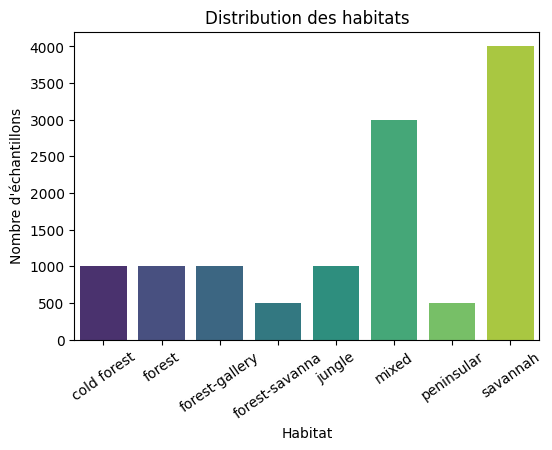

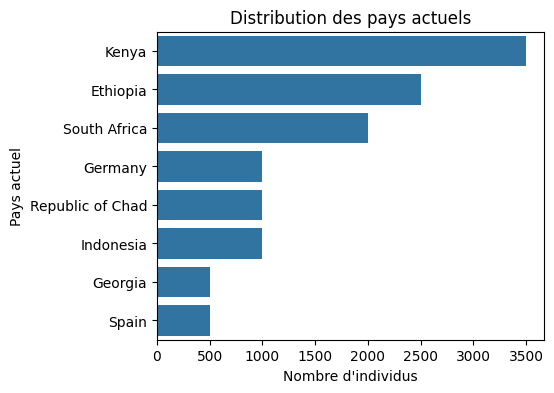

/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/3556317976.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




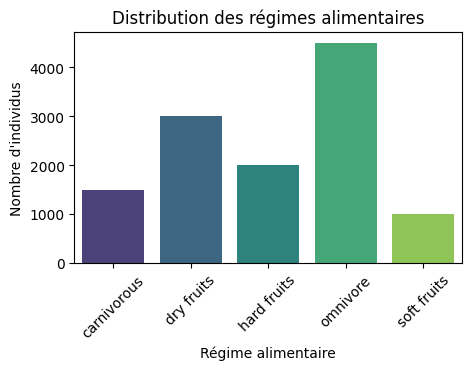

In [76]:
df["Habitat"].value_counts()
# Visualisation de l'habitat
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Habitat", palette="viridis")
plt.title("Distribution des habitats")
plt.xlabel("Habitat")
plt.ylabel("Nombre d'√©chantillons")
plt.xticks(rotation=35)
plt.show()

df["Current_Country"].value_counts()
# Visualisation de la distribution des pays
plt.figure(figsize=(5, 4))
sns.countplot(data=df, y="Current_Country", order=df["Current_Country"].value_counts().index)
plt.title("Distribution des pays actuels")
plt.xlabel("Nombre d'individus")
plt.ylabel("Pays actuel")
plt.show()

df["Diet"].value_counts()
# Visualisation de la distribution des r√©gimes alimentaires
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Diet", palette="viridis")
plt.title("Distribution des r√©gimes alimentaires")
plt.xlabel("R√©gime alimentaire")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.show()

Ces trois graphiques apportent des informations cl√©s sur notre jeu de donn√©es :

R√©partition des habitats
Le premier montre que la grande majorit√© des individus vivaient en savane, avec pr√®s de 4 000 sp√©cimens d√©couverts dans ce type d‚Äôhabitat.

R√©partition g√©ographique
Le deuxi√®me illustre que le Kenya (en Afrique) est de loin la r√©gion la plus repr√©sent√©e, avec environ 3 500 fossiles trouv√©s sur son territoire.

R√©gimes alimentaires
Le troisi√®me r√©v√®le que la plupart des esp√®ces √©taient omnivores, soit un peu plus de 4 000 individus.

Ces visualisations mettent en √©vidence les habitats, les pays et les modes d‚Äôalimentation dominants dans notre √©chantillon.

In [77]:
df["Migrated"].value_counts()

Migrated
no     9000
yes    3000
Name: count, dtype: int64

In [78]:

import time
from geopy.geocoders import Nominatim   # ‚Üê Add this line

# 1. Pr√©parer la colonne √† g√©ocoder (seulement le pays)
df["full_address"] = df["Current_Country"].astype(str)

# 2. Initialiser le g√©ocodeur
geolocator = Nominatim(user_agent="geo_app")

# 3. Fonction ¬´ safe ¬ª pour r√©cup√©rer lat/lon
def geocode_safe(country):
    try:
        loc = geolocator.geocode(country, timeout=10)
        time.sleep(1)  # pause pour respecter le quota
        if loc:
            return pd.Series({"Latitude": loc.latitude, "Longitude": loc.longitude})
    except Exception:
        pass
    return pd.Series({"Latitude": None, "Longitude": None})

# 4. G√©ocoder chaque pays unique
unique_countries = df["full_address"].unique()
geo_df = pd.DataFrame(unique_countries, columns=["full_address"])
geo_df[["Latitude", "Longitude"]] = geo_df["full_address"].apply(geocode_safe)

# 5. Fusionner les coordonn√©es dans le dataframe
df = df.merge(geo_df, on="full_address", how="left")

# 6. R√©sultat
print(df[["Current_Country", "Latitude", "Longitude"]].drop_duplicates().head())



    Current_Country   Latitude  Longitude
0             Kenya   1.441968  38.431398
1          Ethiopia  10.211670  38.652120
4      South Africa -28.816624  24.991639
7  Republic of Chad  15.613414  19.015617
8           Germany  51.163818  10.447831


Ajout des variables g√©ographiques ¬´ longitude ¬ª et ¬´ latitude ¬ª afin de faciliter la visualisation des donn√©es.

# Visualisation

In [79]:
!pip install cluster
!pip install preprocessing


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [80]:
import plotly as py
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time
import pygwalker as pyg
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [81]:
df.dtypes


Genus_&_Specie                 category
Time_(Ma)                       float64
Location                       category
Zone                           category
Current_Country                category
Habitat                        category
Cranial_Capacity_(cm¬≥)          float64
Height_(cm)                     float64
Incisor_Size                   category
Jaw_Shape                      category
Torus_Supraorbital             category
Prognathism                    category
Foramen_M√°gnum_Position        category
Canine Size                    category
Canines_Shape                  category
Tooth_Enamel                   category
Tecno                          category
Tecno_type                     category
biped                          category
Arms                           category
Foots                          category
Diet                           category
Sexual_Dimorphism              category
Hip                            category
Vertical_Front                 categor

In [ ]:
# Affichage des statistiques descriptives pour la colonne "Cranial_Capacity_(cm¬≥)"
df["Cranial_Capacity_(cm¬≥)"].describe()

count    12000.000000
mean       616.824303
std        356.275762
min          0.074910
25%        334.430993
50%        511.320200
75%        919.807697
max       1448.397470
Name: Cranial_Capacity_(cm¬≥), dtype: float64

L'affichage des statistiques descriptives de la capacit√© cr√¢nienne des individus permet d'obtenir rapidement des informations cl√©s, comme la capacit√© minimale (min = 0,074910) et maximale (max = 1448,397470). On peut √©galement conna√Ætre la moyenne de la capacit√© c√©r√©brale ainsi que les diff√©rentes valeurs seuils correspondant aux quartiles.

In [100]:
df.to_csv(
    "Evolution_DataSets_clean.csv",
    index=False,
)

In [84]:
feature_categorical = [cname for cname in df.columns if df[cname].dtype == "object"]
df[feature_categorical] = df[feature_categorical].astype("str")

feature_numeric = [cname for cname in df.columns if df[cname].dtype == "float" or df[cname].dtype=="int"]
print(feature_numeric)
print(feature_categorical)

['Time_(Ma)', 'Cranial_Capacity_(cm¬≥)', 'Height_(cm)', 'Cranial_Capacity_normalized', 'Height_normalized', 'Time_years', 'Latitude', 'Longitude']
['full_address']


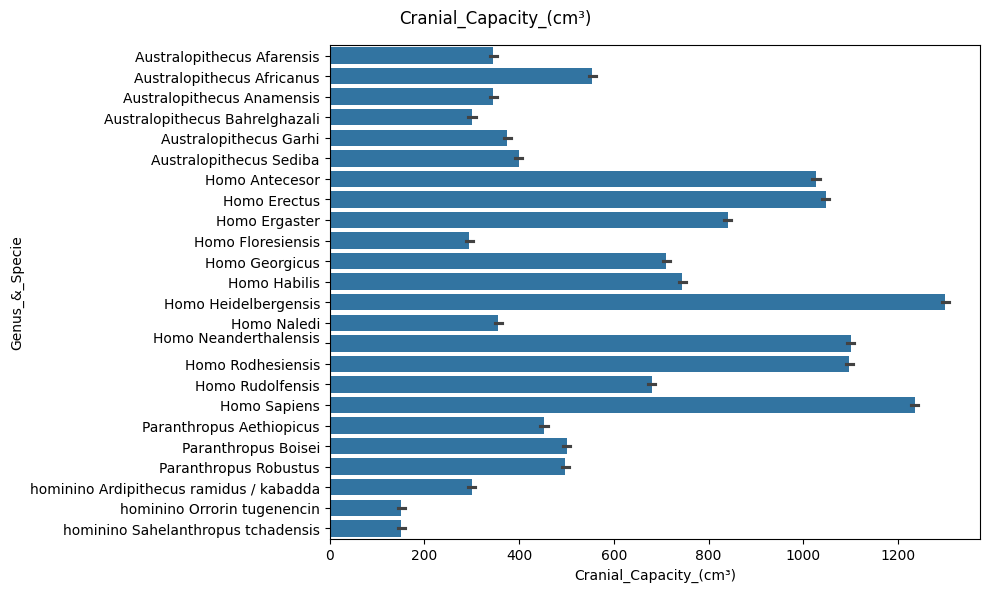

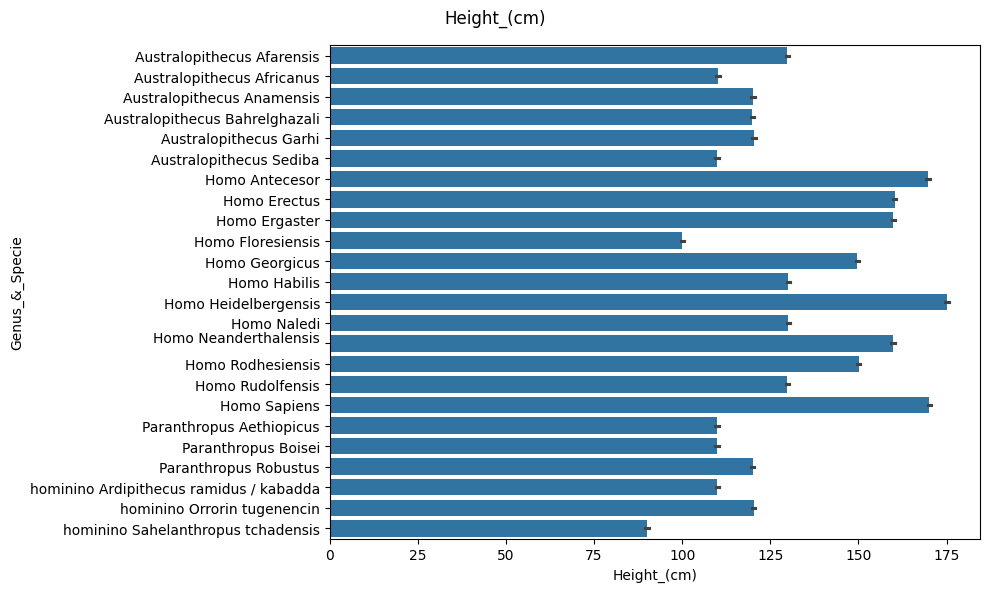

In [85]:
# Ne garder que les deux variables qui t‚Äôint√©ressent
features_to_plot = ["Cranial_Capacity_(cm¬≥)", "Height_(cm)"]

for column in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x=column,
        y="Genus_&_Specie"
    )
      
    plt.suptitle(f'{column}', color='black')
    plt.xlabel(column)
    plt.ylabel("Genus_&_Specie")
    plt.tight_layout()
    plt.show()

Ces deux graphiques nous permettent d‚Äôobtenir des informations sur les diff√©rents individus pr√©sents dans le dataset. Le premier graphique met en √©vidence ceux ayant la plus grande capacit√© cr√¢nienne, comme Homo sapiens et Homo heidelbergensis, dont la capacit√© d√©passe les 1200 cm¬≥. Le second graphique montre que ces m√™mes individus figurent √©galement parmi les plus grands en taille, atteignant environ 1m75. Ces observations sugg√®rent qu‚Äôil pourrait exister une certaine corr√©lation entre la taille corporelle et le volume de la bo√Æte cr√¢nienne.

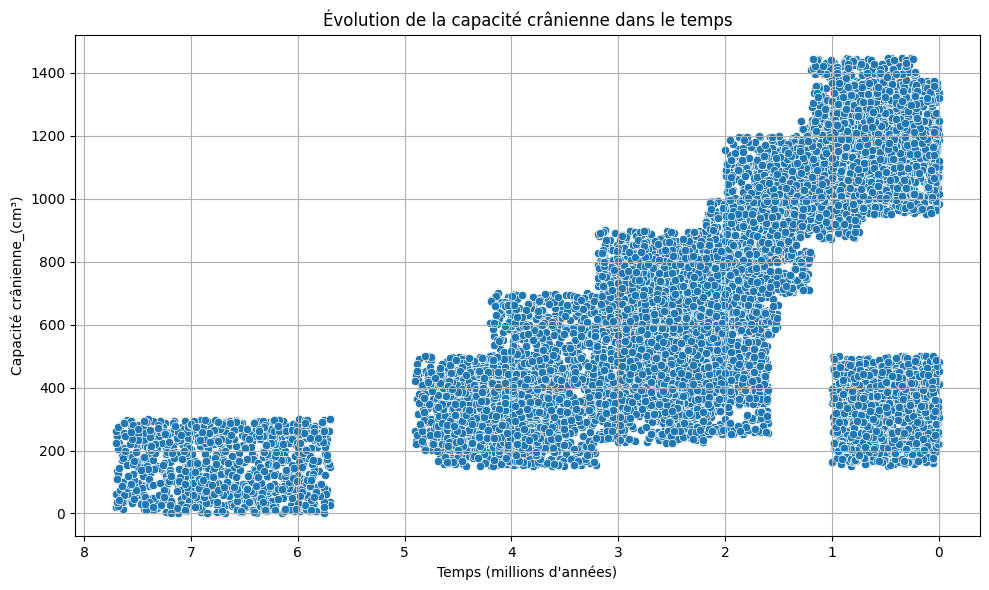

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Time_(Ma)", y="Cranial_Capacity_(cm¬≥)")
plt.title("√âvolution de la capacit√© cr√¢nienne dans le temps")
plt.xlabel("Temps (millions d'ann√©es)")
plt.ylabel("Capacit√© cr√¢nienne_(cm¬≥)")
plt.gca().invert_xaxis()  # inverser l'axe du temps pour aller du pass√© vers le pr√©sent
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisation de la capacit√© cr√¢nienne en fonction du temps


Ce graphique montre une augmentation nette de la capacit√© cr√¢nienne des individus au fil du temps, traduisant une √©volution significative du volume c√©r√©bral chez les hominines.

Entre 7,5 et 5,8 millions d‚Äôann√©es, la capacit√© cr√¢nienne reste tr√®s faible, g√©n√©ralement comprise entre 100 et 300 cm¬≥, ce qui correspond aux premiers hominines, proches des grands singes.

De 5 √† 1 million d‚Äôann√©es, on observe une progression presque lin√©aire : la capacit√© cr√¢nienne passe d‚Äôenviron 200 cm¬≥ √† 1200 cm¬≥, soit un gain de 1000 cm¬≥ sur environ 4 millions d‚Äôann√©es. Cette phase correspond probablement √† l‚Äôapparition et √† l‚Äô√©volution d‚Äôesp√®ces comme Homo habilis et Homo erectus.

Entre 1 million d‚Äôann√©es et environ 500 ans, la capacit√© cr√¢nienne continue d‚Äôaugmenter pour atteindre jusqu‚Äô√† 1500 cm¬≥, ce qui se rapproche des valeurs observ√©es chez l‚ÄôHomme moderne.

On note √©galement qu‚Äô√† ces √©poques plus r√©centes, certains individus pr√©sentent encore des capacit√©s cr√¢niennes comprises entre 150 et 500 cm¬≥. Cela pourrait correspondre √† des esp√®ces archa√Øques tardives ou isol√©es (ex. Homo floresiensis), ou √† des artefacts de mesure ou de datation.

√Ä titre de r√©f√©rence, la capacit√© cr√¢nienne moyenne chez l‚ÄôHomme moderne est d‚Äôenviron 1350 cm¬≥.




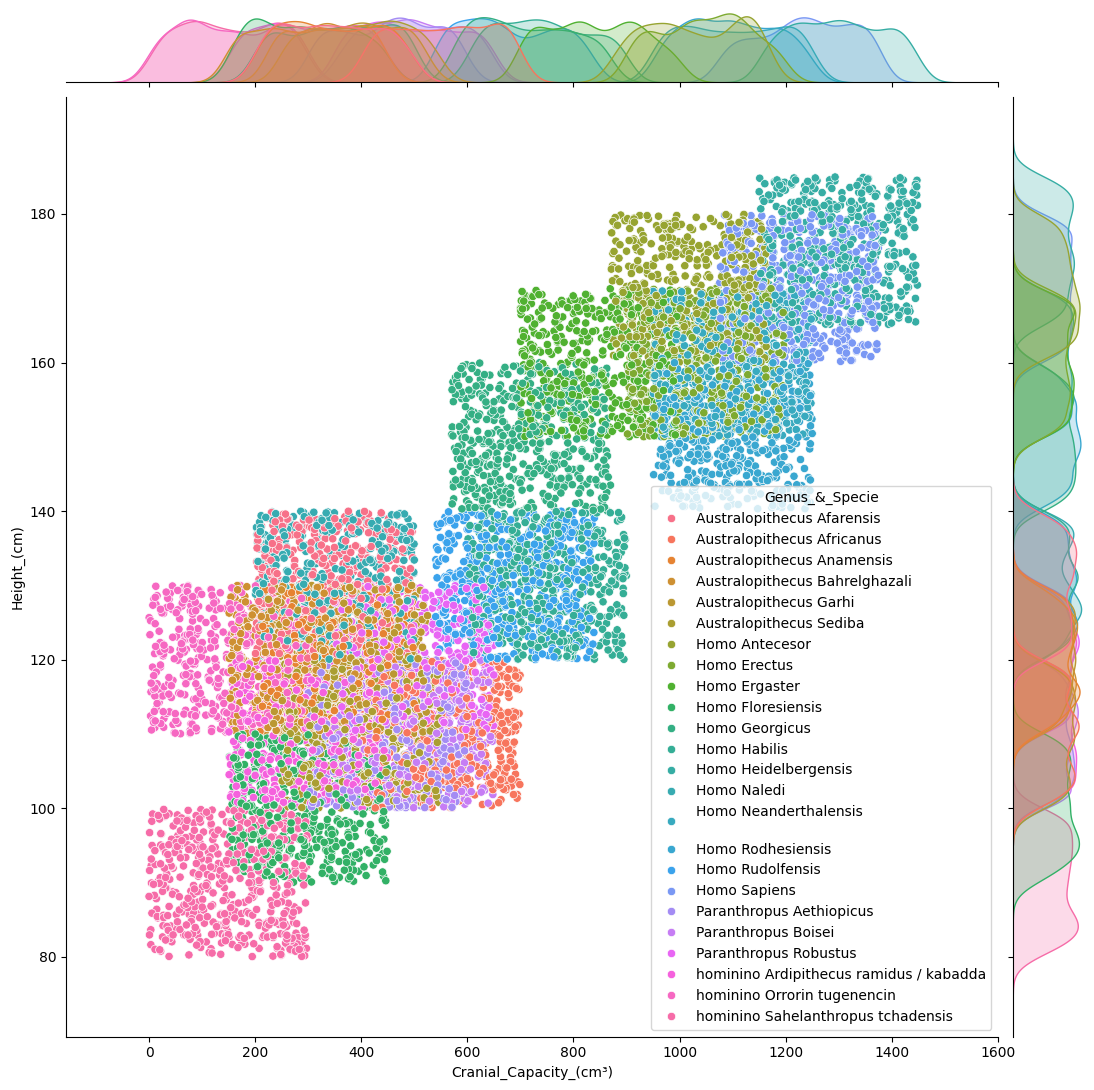

In [87]:
sns.jointplot(data=df, x="Cranial_Capacity_(cm¬≥)", y="Height_(cm)", hue="Genus_&_Specie", height=11, ratio=11)

Ce graphique illustre la relation entre la capacit√© cr√¢nienne (en cm¬≥) et la taille corporelle (en cm) des diff√©rentes esp√®ces du dataset, avec une repr√©sentation en nuage de points color√©s selon le genre et l'esp√®ce. Les distributions marginales en haut et √† droite offrent une vue d'ensemble des densit√©s pour chaque variable.

On constate que les esp√®ces comme Homo sapiens, Homo heidelbergensis et Homo neanderthalensis occupent la partie sup√©rieure droite du graphique, indiquant √† la fois une grande taille corporelle (jusqu‚Äô√† 185 cm) et une capacit√© cr√¢nienne importante (jusqu‚Äô√† 1450 cm¬≥). √Ä l‚Äôoppos√©, des esp√®ces plus anciennes telles que Sahelanthropus tchadensis, Orrorin tugenensis ou encore les Australopith√®ques pr√©sentent des valeurs nettement inf√©rieures pour ces deux variables.

Ce sch√©ma sugg√®re une corr√©lation √©volutive positive entre la taille et la capacit√© cr√¢nienne, renfor√ßant l‚Äôhypoth√®se d‚Äôune √©volution conjointe de ces traits au sein de la lign√©e humaine.

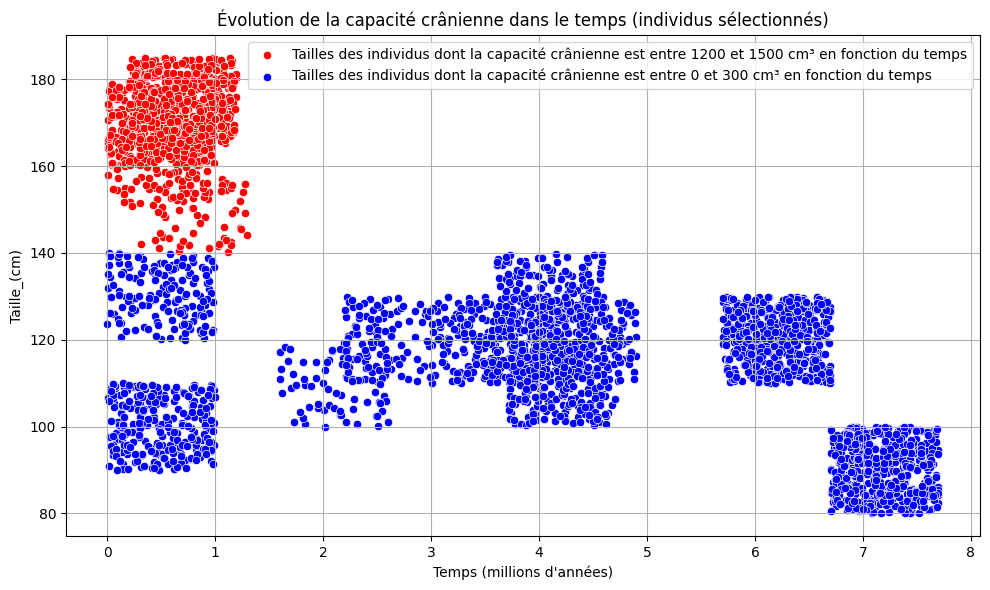

In [88]:
# S√©lection des individus √† forte capacit√© cr√¢nienne


c_sup = (df["Cranial_Capacity_(cm¬≥)"] >= 1200) & (df["Cranial_Capacity_(cm¬≥)"] <= 1500)
c_inf = (df["Cranial_Capacity_(cm¬≥)"] >= 0) & (df["Cranial_Capacity_(cm¬≥)"] <= 300)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[c_sup], x="Time_(Ma)", y="Height_(cm)", color='red', label='Tailles des individus dont la capacit√© cr√¢nienne est entre 1200 et 1500 cm¬≥ en fonction du temps')
sns.scatterplot(data=df[c_inf], x="Time_(Ma)", y="Height_(cm)", color='blue', label='Tailles des individus dont la capacit√© cr√¢nienne est entre 0 et 300 cm¬≥ en fonction du temps')
plt.title("√âvolution de la capacit√© cr√¢nienne dans le temps (individus s√©lectionn√©s)")
plt.xlabel("Temps (millions d'ann√©es)")
plt.ylabel("Taille_(cm)") 
plt.gca().invert_xaxis()
plt.gca().invert_xaxis() # inverser l'axe du temps pour aller du pass√© vers le pr√©sent
plt.legend()
plt.grid(True)
plt.tight_layout()


Ce graphique illustre l‚Äô√©volution de la taille corporelle dans le temps (en millions d‚Äôann√©es) pour deux groupes d‚Äôindividus distincts, selon leur capacit√© cr√¢nienne :

En rouge, les individus dont la capacit√© cr√¢nienne est comprise entre 1200 et 1500 cm¬≥ (essentiellement des esp√®ces r√©centes comme Homo sapiens ou Homo neanderthalensis), montrent une taille √©lev√©e (souvent sup√©rieure √† 160 cm), concentr√©s sur une p√©riode inf√©rieure √† 1 million d‚Äôann√©es.

En bleu, les individus avec une capacit√© cr√¢nienne comprise entre 0 et 300 cm¬≥ (repr√©sentant les esp√®ces les plus anciennes comme Sahelanthropus ou Orrorin) pr√©sentent une taille corporelle plus faible (souvent inf√©rieure √† 130 cm), r√©partis entre 7 et 1 million d‚Äôann√©es.

Ce graphique met en √©vidence une tendance √©volutive : les individus plus r√©cents sont √† la fois plus grands et dot√©s d‚Äôun volume cr√¢nien plus important. Cela confirme une corr√©lation potentielle entre taille corporelle, d√©veloppement c√©r√©bral et temps √©volutif.

/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/2634216390.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



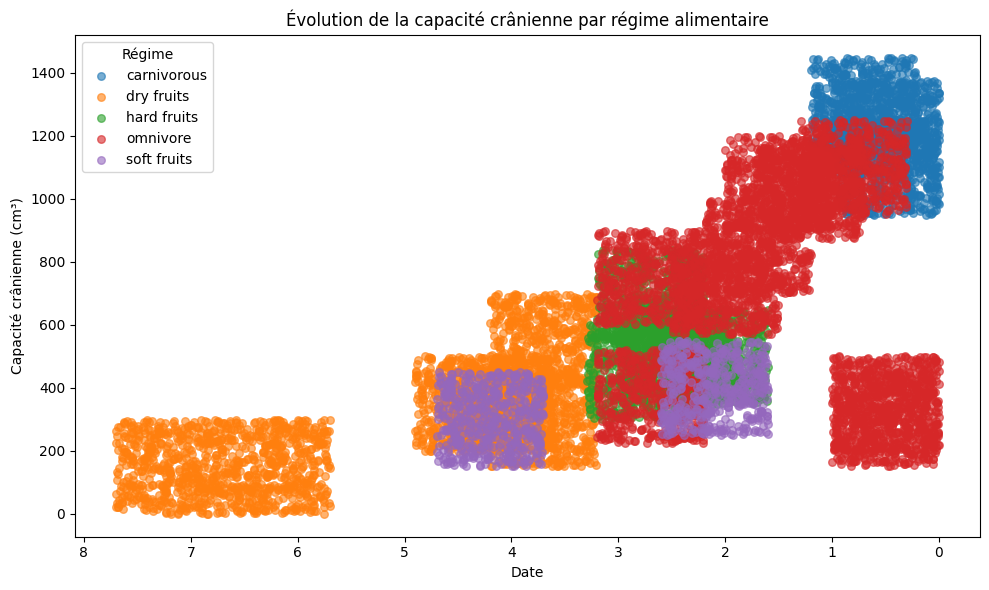

In [89]:

# 2) Tracer un scatter par r√©gime (la couleur est automatique)
plt.figure(figsize=(10,6))
for regime, subset in df.groupby('Diet'):
    plt.scatter(subset['Time_(Ma)'], 
                subset['Cranial_Capacity_(cm¬≥)'], 
                label=regime, 
                alpha=0.6, 
                s=30)
plt.xlabel("Date")
plt.ylabel("Capacit√© cr√¢nienne (cm¬≥)")
plt.gca().invert_xaxis()  # inverser l'axe du temps pour aller du pass√© vers le pr√©sent
plt.title("√âvolution de la capacit√© cr√¢nienne par r√©gime alimentaire")
plt.legend(title="R√©gime")
plt.tight_layout()
plt.show()


Ce graphique pr√©sente l‚Äô√©volution de la capacit√© cr√¢nienne (en cm¬≥) des individus en fonction du temps (axe horizontal invers√©, du plus ancien au plus r√©cent) selon leur r√©gime alimentaire. Chaque point est color√© en fonction du type de r√©gime :

Les individus omnivores (rouge) pr√©sentent une grande variabilit√© et atteignent les plus fortes capacit√©s cr√¢niennes (jusqu‚Äô√† 1400 cm¬≥), notamment au cours du dernier million d‚Äôann√©es.

Les carnivores (bleu) se concentrent √©galement sur les p√©riodes r√©centes et montrent des capacit√©s cr√¢niennes √©lev√©es, similaires aux omnivores.

Les r√©gimes √† base de fruits secs (orange), fruits mous (violet) et fruits durs (vert) sont davantage associ√©s √† des p√©riodes anciennes, avec des capacit√©s cr√¢niennes plus faibles, g√©n√©ralement inf√©rieures √† 600 cm¬≥.

Cette repr√©sentation sugg√®re que l‚Äôadoption de r√©gimes plus diversifi√©s et riches (comme l‚Äôomnivorisme et la consommation de viande) pourrait avoir jou√© un r√¥le dans l‚Äôaugmentation progressive du volume cr√¢nien au cours de l‚Äô√©volution humaine.

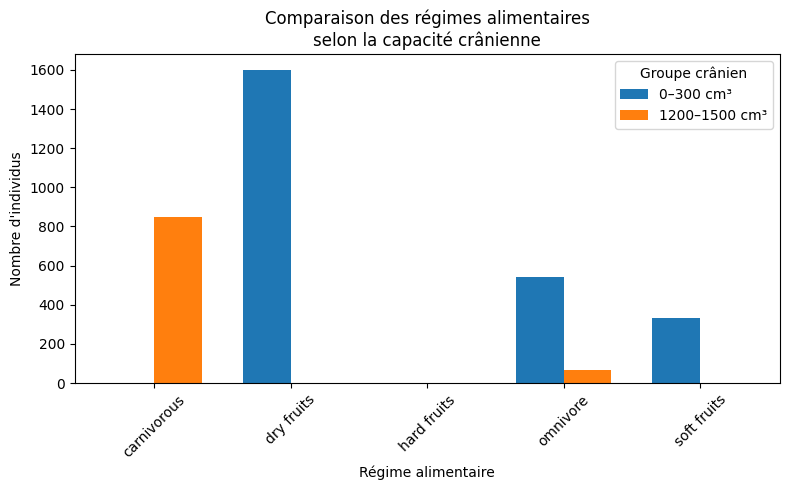

In [90]:
# 1) Cr√©er les masques
c_sup = (df["Cranial_Capacity_(cm¬≥)"] >= 1200) & (df["Cranial_Capacity_(cm¬≥)"] <= 1500)
c_inf = (df["Cranial_Capacity_(cm¬≥)"] >= 0) & (df["Cranial_Capacity_(cm¬≥)"] <= 300)

# 2) Calculer les value_counts pour chaque groupe
counts_sup = df.loc[c_sup, "Diet"].value_counts()
counts_inf = df.loc[c_inf, "Diet"].value_counts()

# 3) Concat√©ner dans un seul DataFrame (remplir les NaN par 0)
counts = pd.DataFrame({
    '0‚Äì300 cm¬≥': counts_inf,
    '1200‚Äì1500 cm¬≥': counts_sup
}).fillna(0)

# 4) Pr√©parer le barplot group√©
labels = counts.index
x = np.arange(len(labels))               # positions sur l‚Äôaxe x
width = 0.35                             # largeur des barres

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, counts['0‚Äì300 cm¬≥'], width, label='0‚Äì300 cm¬≥')
ax.bar(x + width/2, counts['1200‚Äì1500 cm¬≥'], width, label='1200‚Äì1500 cm¬≥')

# 5) Finitions
ax.set_xlabel("R√©gime alimentaire")
ax.set_ylabel("Nombre d'individus")
ax.set_title("Comparaison des r√©gimes alimentaires\nselon la capacit√© cr√¢nienne")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(title="Groupe cr√¢nien")
plt.tight_layout()
plt.show()


Ce graphique compare les diff√©rents r√©gimes alimentaires en fonction de la capacit√© cr√¢nienne des individus, r√©partie en deux groupes :

0‚Äì300 cm¬≥ (en bleu) : individus √† faible capacit√© cr√¢nienne

1200‚Äì1500 cm¬≥ (en orange) : individus √† forte capacit√© cr√¢nienne

On observe que :

Le r√©gime dry fruits (fruits secs) est fortement repr√©sent√© chez les individus √† faible capacit√© cr√¢nienne, avec pr√®s de 1600 individus.

Le r√©gime carnivorous est presque exclusivement associ√© aux individus √† forte capacit√© cr√¢nienne, sugg√©rant un lien entre consommation de viande et d√©veloppement c√©r√©bral.

Le r√©gime omnivore montre une pr√©sence dans les deux groupes, mais reste domin√© par des individus √† capacit√© r√©duite.

Les r√©gimes hard fruits et soft fruits sont faiblement repr√©sent√©s, voire absents dans la cat√©gorie des hauts volumes cr√¢niens.

Ce graphique met en √©vidence une tendance selon laquelle les r√©gimes alimentaires plus √©nerg√©tiquement denses (comme le carnivorisme) pourraient √™tre associ√©s √† une augmentation de la capacit√© cr√¢nienne, soutenant les th√©ories √©volutionnistes du r√¥le de l‚Äôalimentation dans le d√©veloppement cognitif.

In [91]:
df.columns

Index(['Genus_&_Specie', 'Time_(Ma)', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity_(cm¬≥)', 'Height_(cm)', 'Incisor_Size',
       'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
       'Foramen_M√°gnum_Position', 'Canine Size', 'Canines_Shape',
       'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet',
       'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated',
       'Skeleton', 'Cranial_Capacity_normalized', 'Height_normalized',
       'Time_years', 'full_address', 'Latitude', 'Longitude'],
      dtype='object')

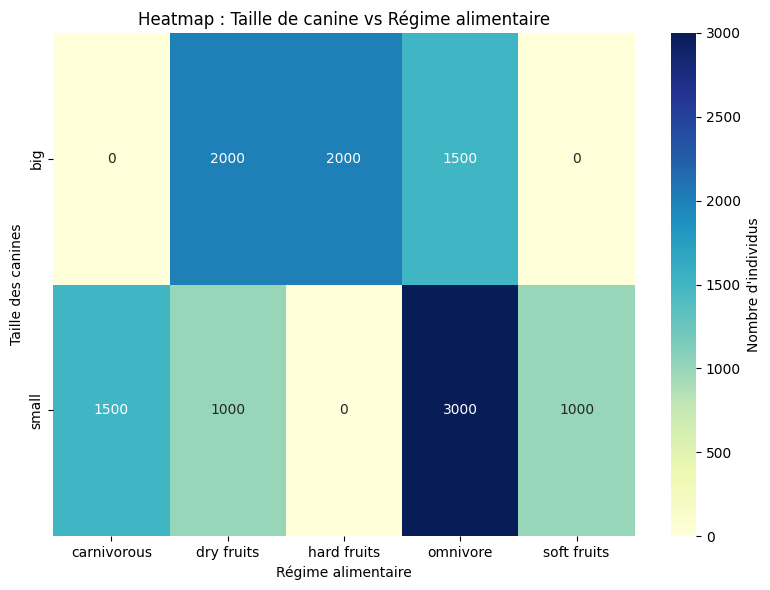

In [92]:
# Calcul du tableau de contingence
ct = pd.crosstab(df["Canine Size"], df["Diet"])

plt.figure(figsize=(8,6))
sns.heatmap(
    ct,
    annot=True,      # affiche les chiffres dans les cases
    fmt="d",         # format entier
    cmap="YlGnBu",
    cbar_kws={"label": "Nombre d'individus"}  # l√©gende de la colorbar
)
plt.title("Heatmap : Taille de canine vs R√©gime alimentaire")
plt.xlabel("R√©gime alimentaire")
plt.ylabel("Taille des canines")
plt.tight_layout()
plt.show()

Ce graphique en chaleur (heatmap) pr√©sente la r√©partition du nombre d‚Äôindividus selon la taille des canines (small ou big) et leur r√©gime alimentaire.

Les individus aux canines petites (small) sont particuli√®rement nombreux chez les r√©gimes omnivores (3000 individus) et carnivores (1500), tandis qu‚Äôils sont absents dans la cat√©gorie hard fruits.

Les grandes canines (big) sont fr√©quentes chez les individus ayant un r√©gime dry fruits et hard fruits (2000 individus chacun), ce qui pourrait √™tre li√© √† des besoins de mastication ou √† des fonctions sociales.

On note que les individus √† canines big sont absents des r√©gimes carnivores et soft fruits, ce qui peut refl√©ter des √©volutions alimentaires sp√©cifiques ou des sp√©cialisations diff√©rentes.

Cette carte de chaleur sugg√®re donc une association entre le type de r√©gime alimentaire et la morphologie dentaire, en particulier la taille des canines. Elle pourrait refl√©ter des adaptations √©volutives aux contraintes m√©caniques ou sociales li√©es √† l‚Äôalimentation.

<Axes: xlabel='Tecno_type', ylabel='Count'>

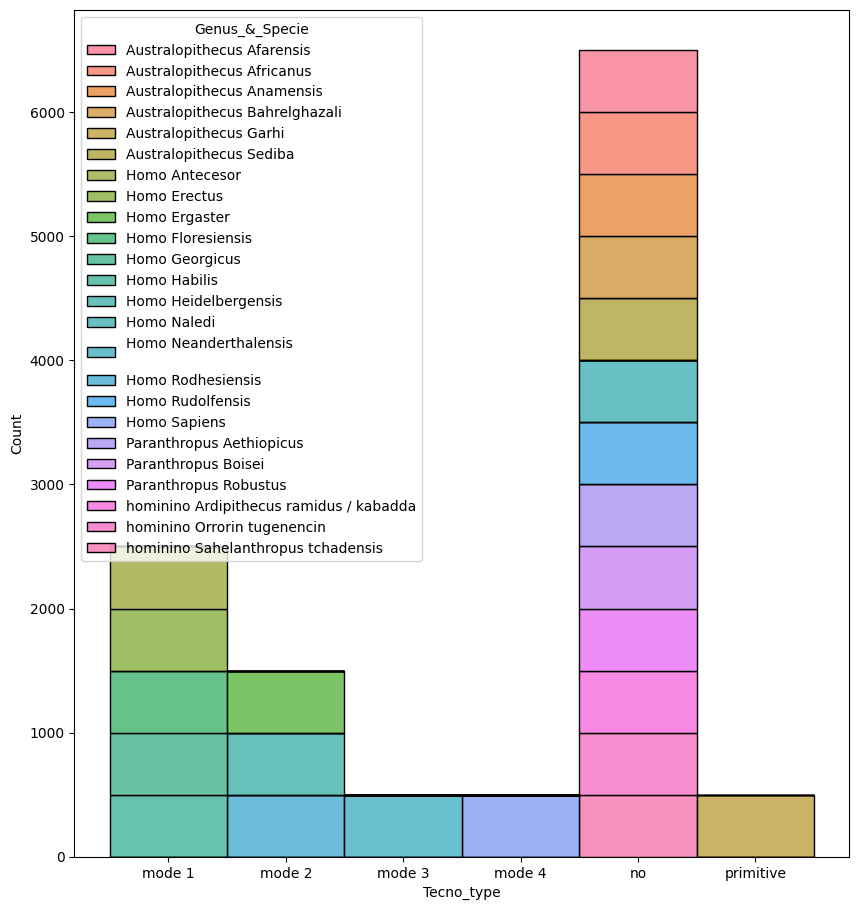

In [93]:
f, ax = plt.subplots(figsize=(10, 11))
sns.histplot(data=df, x="Tecno_type", hue="Genus_&_Specie", multiple="stack")

Ce graphique montre la r√©partition des types de technologies (Tecno_type) associ√©es aux diff√©rentes esp√®ces du dataset. Les barres empil√©es permettent de visualiser, pour chaque cat√©gorie technologique, les esp√®ces concern√©es et le nombre d‚Äôindividus correspondants.

La grande majorit√© des individus appartient √† la cat√©gorie "no", c‚Äôest-√†-dire sans technologie connue. Cette cat√©gorie est domin√©e par des esp√®ces anciennes telles que Australopithecus et Paranthropus, ce qui refl√®te leur absence d‚Äôoutils ou un niveau technologique tr√®s primitif.

Les modes 1 et 2 (correspondant aux premi√®res industries lithiques) sont principalement associ√©s aux esp√®ces du genre Homo, comme Homo habilis et Homo erectus.

Les modes 3 et 4, plus avanc√©s technologiquement, concernent des esp√®ces plus r√©centes telles que Homo neanderthalensis et Homo sapiens.

La cat√©gorie "primitive" reste marginale et se limite √† quelques esp√®ces tr√®s anciennes.

Ce graphique met en √©vidence une progression technologique parall√®le √† l‚Äô√©volution des esp√®ces, avec une complexification des outils au fil du temps, en lien avec l‚Äôapparition d‚Äôesp√®ces du genre Homo et une probable am√©lioration des capacit√©s cognitives.

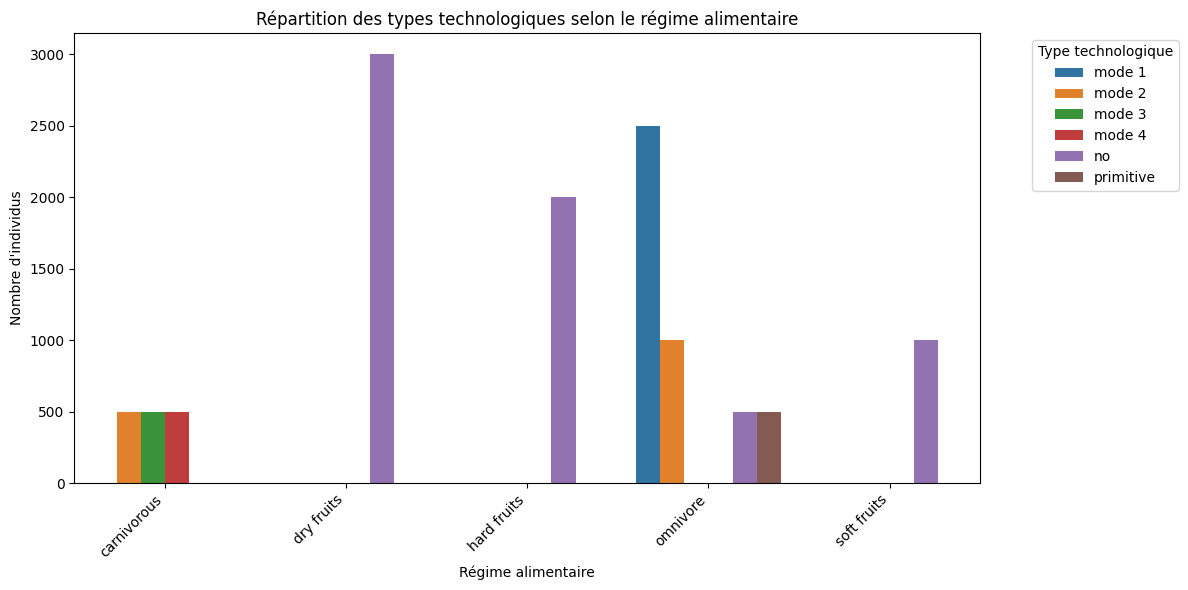

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="Diet",
    hue="Tecno_type"
)
plt.title("R√©partition des types technologiques selon le r√©gime alimentaire")
plt.xlabel("R√©gime alimentaire")
plt.ylabel("Nombre d'individus")
plt.legend(title="Type technologique", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Ce graphique illustre la r√©partition des types technologiques selon les r√©gimes alimentaires des individus pr√©sents dans le dataset. Chaque barre repr√©sente un type technologique (mode 1 √† mode 4, primitive, ou aucun outil), color√©e selon la l√©gende √† droite.

Les individus ayant un r√©gime dry fruits ou hard fruits sont majoritairement d√©pourvus de technologies connues, avec pr√®s de 3000 et 2000 individus respectivement dans la cat√©gorie "no".

Le r√©gime omnivore se distingue par une plus grande diversit√© technique, incluant surtout des technologies mode 1 (‚âà 2500 individus) et mode 2 (‚âà 1000), ainsi qu'une faible part d'outils primitifs. Cela sugg√®re une association entre omnivorisme et d√©veloppement technologique progressif.

Le r√©gime carnivore est uniquement li√© √† des outils avanc√©s (modes 2, 3, 4) avec environ 500 individus pour chaque type, indiquant que la consommation de viande pourrait √™tre corr√©l√©e √† l‚Äôusage d‚Äôoutils sp√©cifiques pour la chasse ou la d√©coupe.

Enfin, les individus √† r√©gime soft fruits sont associ√©s √† des outils tr√®s rudimentaires ou absents, avec 1000 cas sans technologie.

Ce graphique met en lumi√®re une relation probable entre diversification alimentaire et √©mergence technologique, sugg√©rant que certains r√©gimes comme l‚Äôomnivorisme et le carnivorisme ont pu favoriser l‚Äô√©volution culturelle et cognitive.

In [95]:
df.head(1)

Genus_&_Specie  Time_(Ma) Location      Zone Current_Country  \
0  hominino Orrorin tugenencin   6.041124   Africa  oriental           Kenya   

  Habitat  Cranial_Capacity_(cm¬≥)  Height_(cm) Incisor_Size Jaw_Shape  ...  \
0  forest                144.5141    110.24323        small   conical  ...   

  Vertical_Front Anatomy Migrated Skeleton Cranial_Capacity_normalized  \
0             no     old       no    light                    0.099775   

  Height_normalized  Time_years full_address  Latitude  Longitude  
0          0.595969  6041123.75        Kenya  1.441968  38.431398  

[1 rows x 34 columns]

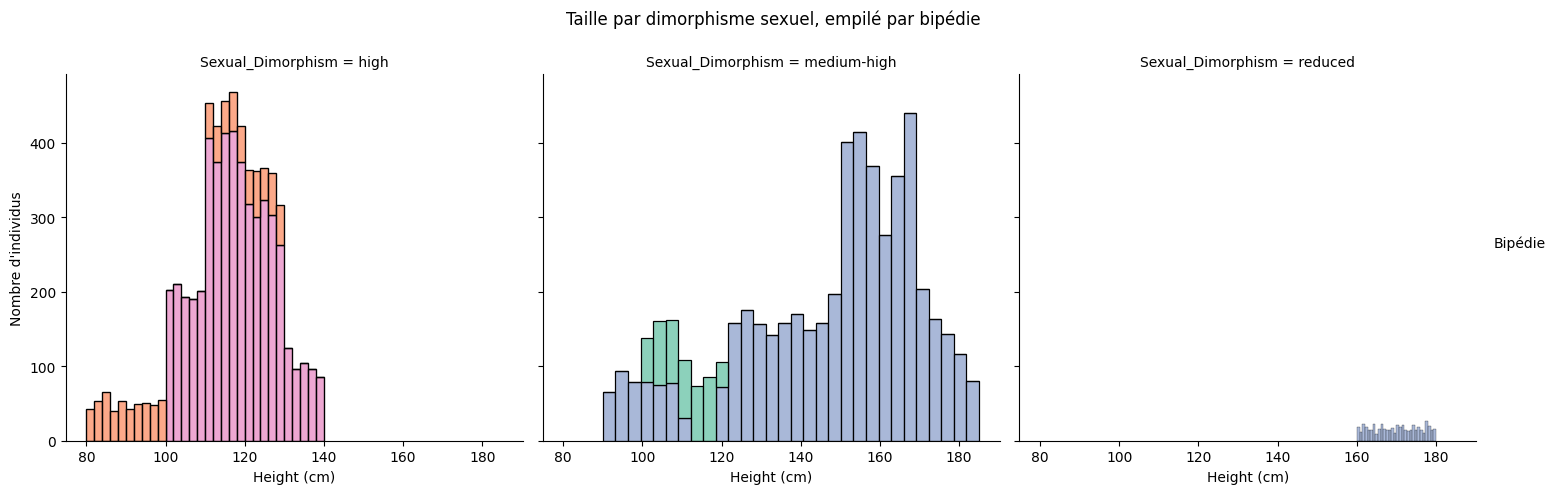

In [96]:
# Taille par Sexual_Dimorphism, empil√© par bip√©die, en deux volets
g = sns.FacetGrid(
    df,
    col="Sexual_Dimorphism",
    height=5,
    aspect=1
)
g.map_dataframe(
    sns.histplot,
    x="Height_(cm)",
    hue="biped",
    multiple="stack",
    stat="count",
    element="bars",
    palette="Set2",
    bins=30
)
g.set_axis_labels("Height (cm)", "Nombre d'individus")
g.add_legend(title="Bip√©die")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Taille par dimorphisme sexuel, empil√© par bip√©die")
plt.show()

Ce graphique pr√©sente la r√©partition des tailles (Height) selon le niveau de dimorphisme sexuel (Sexual_Dimorphism) et en fonction de la bip√©die (empilement des barres). Il est divis√© en trois sous-graphes repr√©sentant chacun un niveau de dimorphisme : high, medium-high et reduced.

Pour les individus avec un dimorphisme sexuel √©lev√© (high), les tailles sont majoritairement concentr√©es entre 100 et 130 cm, avec une pr√©sence des deux types de bip√©die. On remarque une distribution asym√©trique, avec un grand nombre d'individus autour de 110‚Äì120 cm.

Dans la cat√©gorie medium-high, les tailles sont beaucoup plus dispers√©es, allant de 100 √† 180 cm, avec un pic notable autour de 160 cm. Cette cat√©gorie semble fortement domin√©e par des individus bip√®des.

Enfin, pour le dimorphisme r√©duit, on observe une distribution tr√®s concentr√©e entre 160 et 180 cm, exclusivement compos√©e d‚Äôindividus bip√®des, sugg√©rant une homog√©n√©it√© morphologique r√©cente.

Ce graphique sugg√®re que la r√©duction du dimorphisme sexuel s‚Äôaccompagne d‚Äôune augmentation globale de la taille et d‚Äôune standardisation vers la bip√©die, ce qui est coh√©rent avec les √©volutions observ√©es chez les hominid√©s modernes.

In [97]:
import plotly.express as px

# 1. V√©rifier les colonnes
if 'Current_Country' not in df.columns or 'Cranial_Capacity_(cm¬≥)' not in df.columns:
    raise ValueError("Les colonnes 'Current_Country' ou 'Cranial_Capacity_(cm¬≥)' sont manquantes.")

# 2. Moyenne de la capacit√© cr√¢nienne par pays
mean_cranial = (
    df.groupby('Current_Country')['Cranial_Capacity_(cm¬≥)']
      .mean()
      .reset_index(name='Mean_Cranial_Capacity')
)

# 3. Carte de points
fig_scatter = px.scatter_geo(
    mean_cranial,
    locations='Current_Country',
    locationmode='country names',
    color='Mean_Cranial_Capacity',
    color_continuous_scale='Viridis',
    projection='natural earth',
    title="Capacit√© cr√¢nienne moyenne par pays"
)
fig_scatter.show()

# 4. Densit√© d'observations par pays
obs_count = (
    df['Current_Country']
      .value_counts()
      .reset_index(name='Observation_Count')
      .rename(columns={'index': 'Current_Country'})
)

fig_density = px.choropleth(
    obs_count,
    locations='Current_Country',
    locationmode='country names',
    color='Observation_Count',
    color_continuous_scale='Reds',
    projection='natural earth',
    title="Densit√© d'observations par pays"
)
fig_density.show()


/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/759611172.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Ces deux cartes permettent de visualiser la capacit√© cr√¢nienne moyenne ainsi que la densit√© d‚Äôobservations par pays √† travers le globe.

### Carte 1 : Capacit√© cr√¢nienne moyenne par pays
Cette carte utilise un d√©grad√© de couleurs allant du violet (capacit√©s faibles) au jaune (capacit√©s √©lev√©es).
On remarque que :

Les valeurs les plus √©lev√©es (proches de 1200 cm¬≥) sont localis√©es dans certains pays d‚ÄôEurope ou d‚ÄôAsie de l'Est.

Des pays comme l‚Äô√âthiopie ou le Kenya pr√©sentent une capacit√© moyenne plus mod√©r√©e √† faible, ce qui peut s‚Äôexpliquer par la forte proportion d‚Äôesp√®ces anciennes dans les donn√©es.

### Carte 2 : Densit√© d‚Äôobservations par pays
Elle met en √©vidence le nombre d‚Äôindividus recens√©s dans chaque pays, avec un d√©grad√© allant du blanc au rouge fonc√©.

Le Kenya appara√Æt comme le pays le plus repr√©sent√© dans le dataset, suivi par l‚Äô√âthiopie et l‚ÄôAfrique du Sud, ce qui refl√®te leur r√¥le central dans les d√©couvertes pal√©oanthropologiques.

Certains pays d‚ÄôAsie du Sud-Est et d‚ÄôOc√©anie apparaissent √©galement, mais avec un nombre plus restreint d‚Äôobservations.

üîç Analyse crois√©e :
Bien que certains pays pr√©sentent une forte densit√© d‚Äôobservations, cela ne signifie pas n√©cessairement qu‚Äôils affichent une capacit√© cr√¢nienne moyenne √©lev√©e, soulignant l‚Äôimportance de contextualiser les donn√©es en fonction des esp√®ces pr√©sentes dans chaque r√©gion.